In [28]:
import pandas as pd
import missingno as msno

In [93]:
# 1) Загрузите датасет и ознакомьтесь с количеством пропущенных значений.
df = pd.read_csv("data/18homework.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [68]:
missing_values = (df.isna().sum()/ len(df)).sort_values()
missing_values

id                0.0000
state             0.0000
price_category    0.0000
manufacturer      0.0000
odometer          0.0000
region_url        0.0000
region            0.0000
url               0.0000
price             0.0000
image_url         0.0002
description       0.0002
posting_date      0.0002
date              0.0002
year              0.0036
transmission      0.0045
fuel              0.0063
lat               0.0098
long              0.0098
model             0.0128
title_status      0.0166
dtype: float64

In [69]:
def print_useful_rows_info(df): 
   print("Количество полностью заполненных объектов из всей     выборки: ", len(df.dropna()))
   print("Процент полностью заполненных объектов из всей выборки: ", round(len(df.dropna()) / len(df) * 100, 2))
   

In [70]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей     выборки:  9507
Процент полностью заполненных объектов из всей выборки:  95.07


<Axes: >

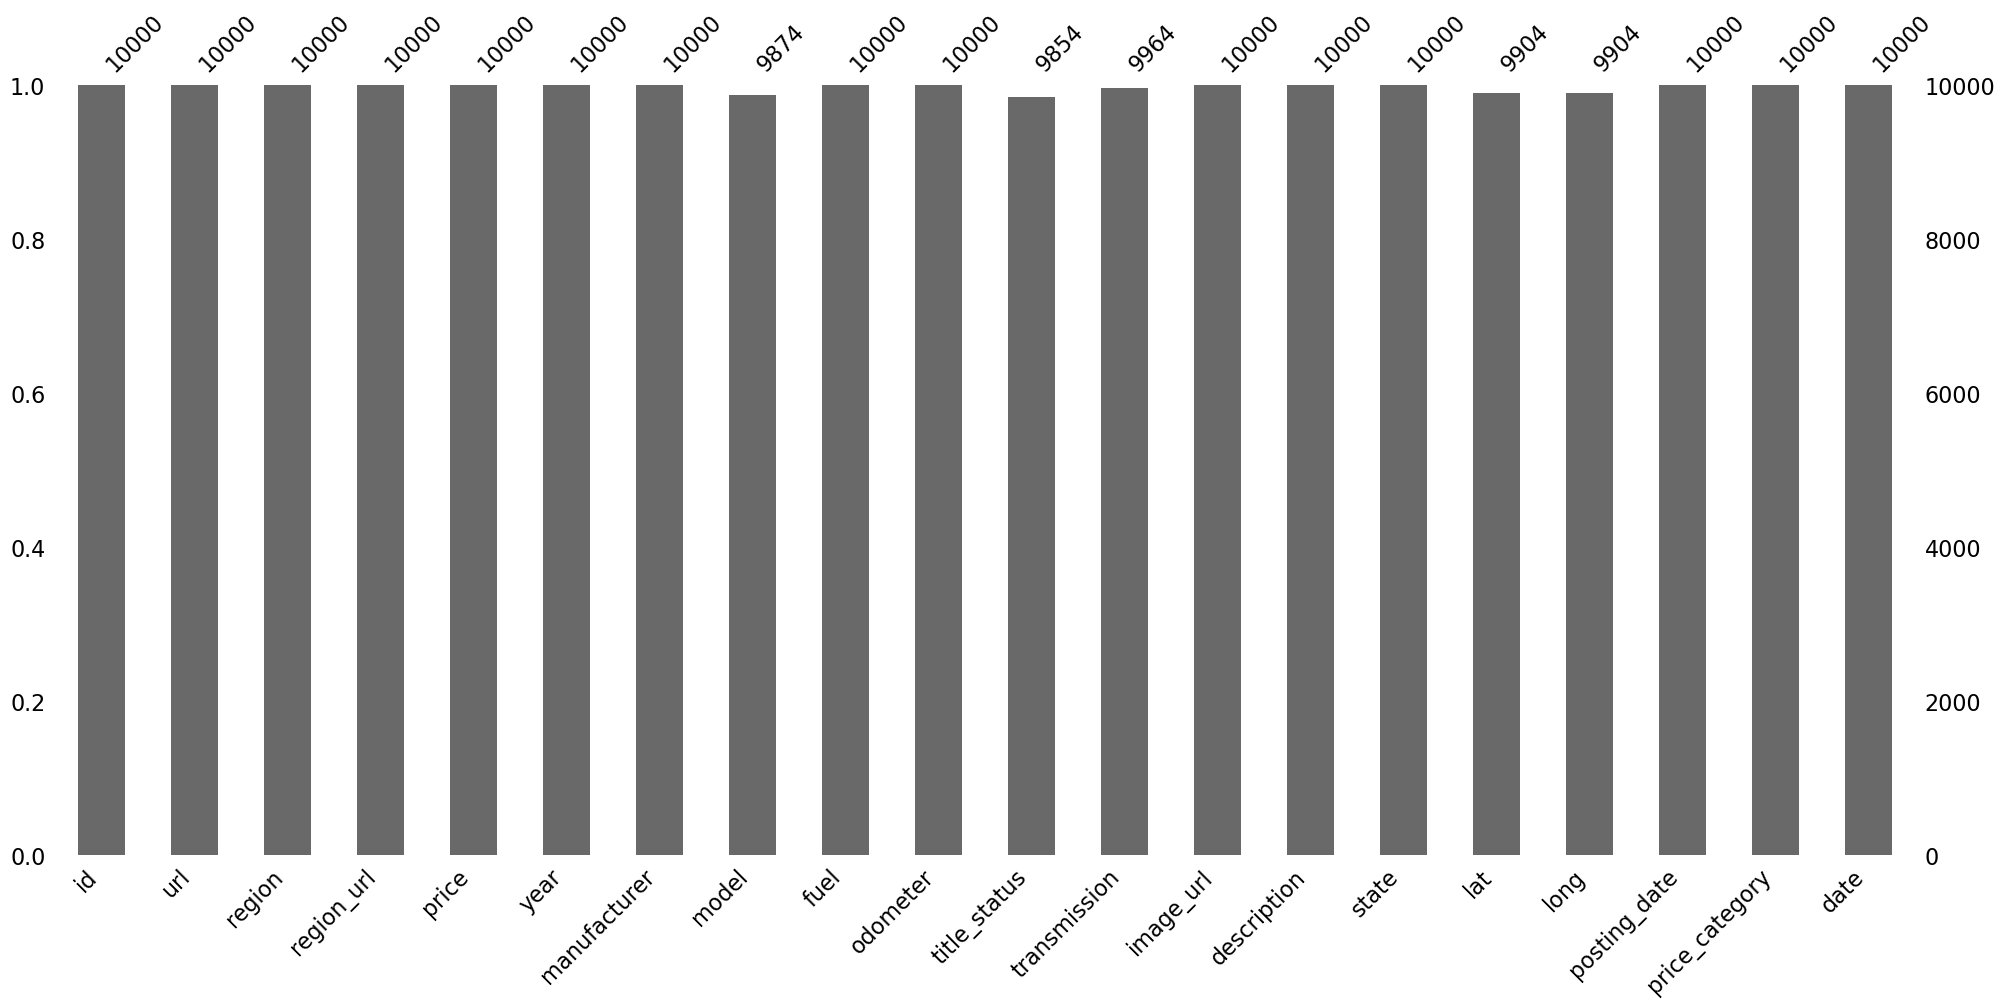

In [83]:
msno.bar(df)

In [113]:
# 2) Обработаем пропуски в годе выпуска автомобиля -> заменим на среднее значение
df[df.year.isna()] = int(df.year.mean())

In [114]:
# 3) Обработайте пропуски в типе топлива -> заменим на other
df.fuel.mode().values[0]
df.fuel = df.fuel.fillna("other")

In [95]:
df.fuel.value_counts(dropna=False)

fuel
gas         8402
other        793
diesel       653
hybrid       108
electric      44
Name: count, dtype: int64

In [102]:
# 4) Обработайте пропуски в модели автомобиля. -> Удалим эти пропуски
# df = df.dropna(subset=['model'])
df.model.value_counts(normalize=True,dropna=False)


model
f-150                        0.015296
silverado 1500               0.011143
1500                         0.010130
camry                        0.007800
silverado                    0.007496
                               ...   
grand caravan sport          0.000101
Nascar                       0.000101
titan le                     0.000101
sorrento lx v6               0.000101
a3 2.0t premium plus pzev    0.000101
Name: proportion, Length: 3466, dtype: float64

In [108]:
# 5) Обработайте пропуски в статусе автомобиля. -> заменим на моду
df.title_status = df.title_status.fillna(df.title_status.mode().values[0])
df.title_status.value_counts(normalize=True,dropna=False)


title_status
clean         0.968497
rebuilt       0.016917
salvage       0.009218
lien          0.003545
missing       0.001621
parts only    0.000203
Name: proportion, dtype: float64

In [116]:
# 6) Преобразуйте типы данных в годе выпуска автомобиля.
df.year.value_counts(dropna=False)

year
2017.0    805
2018.0    804
2016.0    735
2013.0    697
2015.0    663
         ... 
1927.0      1
1931.0      1
1958.0      1
1937.0      1
1954.0      1
Name: count, Length: 87, dtype: int64

In [117]:
# 7) Преобразуйте типы данных в категориальные переменные.

In [137]:
# 8) Определите выбросы в годе выпуска.
df_out = df.copy()
df.year.describe().apply(lambda x: f"{x:0.3f}")

count    9872.000
mean     2011.069
std         9.349
min      1915.000
25%      2008.000
50%      2013.000
75%      2017.000
max      2022.000
Name: year, dtype: object

In [141]:
df_out.year.describe().apply(lambda x: f"{x:0.3f}")

count    9872.000
mean     2011.738
std         6.440
min      1994.000
25%      2008.000
50%      2013.000
75%      2017.000
max      2022.000
Name: year, dtype: object

In [122]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [143]:
boundaries = calculate_outliers(df_out.year)
boundaries

(1994.5, 2030.5)

Выбросов сверху нет, выбросы только снизу, поэтому заменим их на нижнюю границу 

In [144]:
is_outliner = (df_out.year < boundaries[0]) | (df_out.year > boundaries[1])
is_outliner.sum()/len(df_out)

0.03697325769854133

In [146]:
df_out.loc[is_outliner, 'year'] = int(boundaries[0])
df_out.loc[is_outliner, 'year']

13      1994.0
21      1994.0
57      1994.0
66      1994.0
106     1994.0
         ...  
9859    1994.0
9886    1994.0
9921    1994.0
9944    1994.0
9990    1994.0
Name: year, Length: 365, dtype: float64

In [147]:
df_out.year.describe().apply(lambda x: f"{x:0.3f}")


count    9872.000
mean     2011.738
std         6.440
min      1994.000
25%      2008.000
50%      2013.000
75%      2017.000
max      2022.000
Name: year, dtype: object